# Initialization

In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Mounting Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading dataset

df_unclean = pd.read_csv('/content/drive/MyDrive/Capstone/forestfires.csv')
df_unclean.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Getting a description of the dataset

df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
# Checking the shape of the dataset

print("The shape of the dataset is:", df_unclean.shape)

The shape of the dataset is: (517, 13)


# Pre-processing

In [ ]:
# Checking for NA values

print("The number of NA values in the dataset is:", df_unclean.isna().sum().sum())

The number of NA values in the dataset is: 0


In [ ]:
# Checking for skewness in the predictor variable

df_unclean.skew(axis = 0)

<ipython-input-7-8eb90570338d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_unclean.skew(axis = 0)


X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

In [ ]:
# Correcting the skewness in the response variable

df = df_unclean.copy()
df['area'] = np.log(df['area'] + 1)
print("Previous skew of area:", df_unclean['area'].skew())
print("Current skew of area:", df['area'].skew())

Previous skew of area: 12.846933533934868
Current skew of area: 1.2178376559535011


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'After applying log')]

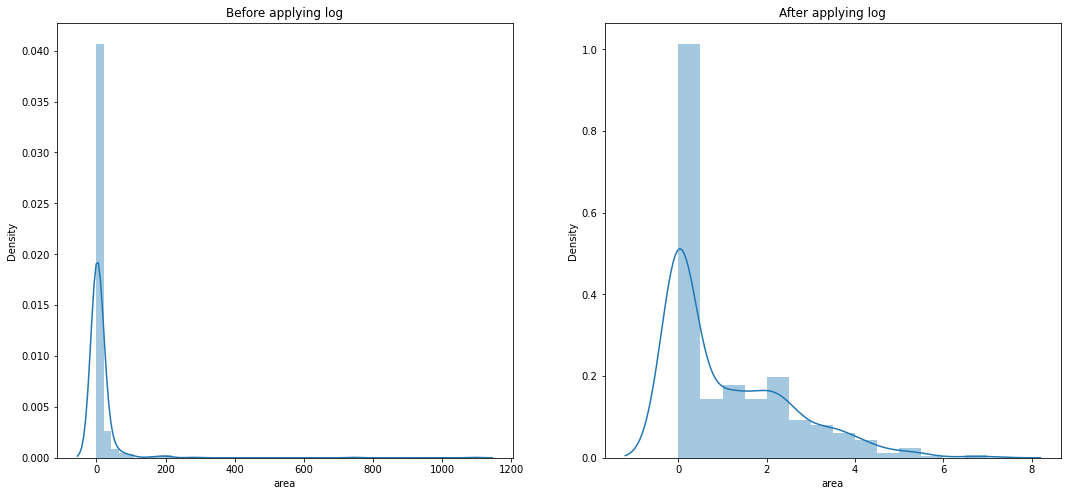

In [ ]:
# Plotting skewness of the response variable before and after preprocessing

plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(1, 2)

plot1 = sns.distplot(df_unclean['area'], ax = ax[0])
plot1.set(title = 'Before applying log')
plot2 = sns.distplot(df['area'], ax = ax[1])
plot2.set(title = 'After applying log')

In [ ]:
# Exploring the dataset

# print(min(df['rain']))
# print(max(df['rain']))
# df['day'].unique()

In [ ]:
# Normalizing the FWI and other climatic factors

normalizer = MinMaxScaler()
FFMC_transform = np.array(df['FFMC']).reshape(-1, 1)
DMC_transform = np.array(df['DMC']).reshape(-1, 1)
DC_transform = np.array(df['DC']).reshape(-1, 1)
ISI_transform = np.array(df['ISI']).reshape(-1, 1)
temp_transform = np.array(df['temp']).reshape(-1, 1)
RH_transform = np.array(df['RH']).reshape(-1, 1)
wind_transform = np.array(df['wind']).reshape(-1, 1)
rain_transform = np.array(df['rain']).reshape(-1, 1)
df['FFMC'] = normalizer.fit_transform(FFMC_transform)
df['DMC'] = normalizer.fit_transform(DMC_transform)
df['DC'] = normalizer.fit_transform(DC_transform)
df['ISI'] = normalizer.fit_transform(ISI_transform)
df['temp'] = normalizer.fit_transform(temp_transform)
df['RH'] = normalizer.fit_transform(RH_transform)
df['wind'] = normalizer.fit_transform(wind_transform)
df['rain'] = normalizer.fit_transform(rain_transform)

In [ ]:
# Converting categorical values to numerical values

df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df['day'] = df['day'].replace(['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], [1, 2, 3, 4, 5, 6, 7])
print("The dataset after cleaning:") 
df.head()

The dataset after cleaning:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


# Creating a baseline model

In [ ]:
# Splitting the dataset into train and test

X = df.drop(columns = ['area'])
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Printing the shapes of the train and test datasets

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (413, 12)
y_train: (413,)
X_test: (104, 12)
y_test: (104,)


In [ ]:
# Implementing linear regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
train_rmse = math.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)
test_rmse = math.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)
print("The train rmse using linear regression:", round(train_rmse, 3))
print("The train r2 score using linear regression:", round(train_r2, 3))
print("The test rmse using linear regression:", round(test_rmse, 3))
print("The test r2 score using linear regression:", round(test_r2, 3))

The train rmse using linear regression: 1.35
The train r2 score using linear regression: 0.035
The test rmse using linear regression: 1.467
The test r2 score using linear regression: 0.021


In [ ]:
# Implementing Lasso Regression

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
train_preds = ridge.predict(X_train)
test_preds = ridge.predict(X_test)
train_rmse = math.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)
test_rmse = math.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)
print("The train rmse using lasso regression:", round(train_rmse, 3))
print("The train r2 score using lasso regression:", round(train_r2, 3))
print("The test rmse using lasso regression:", round(test_rmse, 3))
print("The test r2 score using lasso regression:", round(test_r2, 3))

The train rmse using lasso regression: 1.351
The train r2 score using lasso regression: 0.033
The test rmse using lasso regression: 1.463
The test r2 score using lasso regression: 0.026


# Results

After obtaining clarification of the problem at hand to some extent with data cleaning and EDA, we proceeded forward with creating 2 baseline models. The results of those models are:

1. Linear regression - RMSE: 1.467, R2: 0.021
2. Ridge regression - RMSE: 1.463, R2: 0.026

The reasons behind the models performing like they do can be:

1. Outliers and 0 area - The data has a couple of outliers which we will look more into and decide the kind of step we have to take to manipulate/remove them. Some values indicate that there is no forest fire(area of 0), which is acceptable, but we have to find a way to improve our method of scaling/normalization to match other outcomes.

2. Simplistic models - The models chosen here are meant to be simplistic as they are baseline. We hope to achieve improved results with more complex models with which we have control over model parameters.